In [16]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('float_format', '{:f}'.format)

In [17]:
def get_cols(df: pd.DataFrame) -> tuple:
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()

    return numeric_columns, categorical_columns

# *balances*

In [18]:
df_balances = (
    pd.read_csv('../data/raw/balances.csv')
    [['PERIODO','ID','CANT_EMP_NEG','CANT_EMP_CONS','CANT_EMP_HIPOT','SALDO_MED_EMP','SALDO_PEQ_EMP','SALDO_MIC_EMP','SALDO_CONS_REV','SALDO_CONS_NO_REV','SALDO_HIPOT','SALDO_VENCIDO']]
)

"""
PERIODO - Periodo de extracción de los datos
ID - Identificador único

CANT_EMP_NEG - Cantidad de empresas de negocio
CANT_EMP_CONS - Cantidad de empresas de consumo
CANT_EMP_HIPOT - Cantidad de empresas hipotecario
    * last
    * variable para ver si cerro o abrio empresas en los ultimos 9 meses

SALDO_MED_EMP - Saldo en mediana empresa
SALDO_PEQ_EMP - Saldo en pequeña empresa
SALDO_MIC_EMP - Saldo en micro empresa
    * categorica para saber que tipo de empresa tiene
    * last
    * variacion promedio de los saldos en los saldos que tiene

SALDO_CONS_REV - Saldo Consumo revolvente
SALDO_CONS_NO_REV - Saldo Consumo NO revolvente
    
SALDO_HIPOT - Saldo en hipotecario
SALDO_VENCIDO - Saldo vencido

CANT_EMP_DOL_NEG - Cantidad de empresas de negocios en dólares
SALDO_DOLA_NEG - Saldo en dólares de negocio
CANT_EMP_DOL_CONS - Cantidad de empresas de consumo en dólares
SALDO_DOLA_CONS - Saldo en dólares de consumo
CANT_EMP_DOL_HIPOT - Cantidad de empresas de hipotecario en dólares
SALDO_DOLA_HIPOT - Saldo en dólares de hipotecario
MAX_LINEA_DISP_U6M - Línea Máxima disponible en los últimos 6 meses
"""


'\nPERIODO - Periodo de extracción de los datos\nID - Identificador único\n\nCANT_EMP_NEG - Cantidad de empresas de negocio\nCANT_EMP_CONS - Cantidad de empresas de consumo\nCANT_EMP_HIPOT - Cantidad de empresas hipotecario\n    * last\n    * variable para ver si cerro o abrio empresas en los ultimos 9 meses\n\nSALDO_MED_EMP - Saldo en mediana empresa\nSALDO_PEQ_EMP - Saldo en pequeña empresa\nSALDO_MIC_EMP - Saldo en micro empresa\n    * categorica para saber que tipo de empresa tiene\n    * last\n    * variacion promedio de los saldos en los saldos que tiene\n\nSALDO_CONS_REV - Saldo Consumo revolvente\nSALDO_CONS_NO_REV - Saldo Consumo NO revolvente\n    \nSALDO_HIPOT - Saldo en hipotecario\nSALDO_VENCIDO - Saldo vencido\n\nCANT_EMP_DOL_NEG - Cantidad de empresas de negocios en dólares\nSALDO_DOLA_NEG - Saldo en dólares de negocio\nCANT_EMP_DOL_CONS - Cantidad de empresas de consumo en dólares\nSALDO_DOLA_CONS - Saldo en dólares de consumo\nCANT_EMP_DOL_HIPOT - Cantidad de empresas 

In [19]:
df_balances['SALDO_EMP_TOTAL'] = df_balances['SALDO_MED_EMP'] + df_balances['SALDO_PEQ_EMP'] + df_balances['SALDO_MIC_EMP'] + df_balances['SALDO_HIPOT'] + df_balances['SALDO_CONS_REV'] + df_balances['SALDO_CONS_NO_REV']

df_balances['SALDO_EMP_TOTAL-VENCIDO'] = df_balances['SALDO_EMP_TOTAL'] - df_balances['SALDO_VENCIDO']
df_balances['SALDO_REV_NO_REV-VENCIDO'] = df_balances['SALDO_CONS_REV'] + df_balances['SALDO_CONS_NO_REV'] - df_balances['SALDO_VENCIDO']
df_balances['SALDO_TOTAL-VENCIDO'] = df_balances['SALDO_EMP_TOTAL'] + df_balances['SALDO_CONS_REV'] + df_balances['SALDO_CONS_NO_REV'] - df_balances['SALDO_VENCIDO']

In [20]:
df_balances['TIENE_SALDO_VENCIDO'] = 0
indexes_SALDO_VENCIDO = df_balances[df_balances['SALDO_VENCIDO'] > 0].index
df_balances.loc[indexes_SALDO_VENCIDO, 'TIENE_SALDO_VENCIDO'] = 1
df_balances['CANT_MESES_SALDO_VENCIDO'] = df_balances.groupby('ID')['TIENE_SALDO_VENCIDO'].transform('sum')
df_balances = df_balances.drop(columns=['TIENE_SALDO_VENCIDO'])

In [21]:
df_balances.head(9*4)

,PERIODO,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,SALDO_EMP_TOTAL,SALDO_EMP_TOTAL-VENCIDO,SALDO_REV_NO_REV-VENCIDO,SALDO_TOTAL-VENCIDO,CANT_MESES_SALDO_VENCIDO
0,202301,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,405.000000,0.000000,0.000000,0.000000,0.000000,405.000000,405.000000,0.000000,405.000000,0
1,202302,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,346.566600,0.000000,0.000000,0.000000,0.000000,346.566600,346.566600,0.000000,346.566600,0
2,202303,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,283.086900,0.000000,0.000000,0.000000,0.000000,283.086900,283.086900,0.000000,283.086900,0
3,202304,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,217.987200,0.000000,0.000000,0.000000,0.000000,217.987200,217.987200,0.000000,217.987200,0
4,202305,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,148.942800,0.000000,0.000000,0.000000,0.000000,148.942800,148.942800,0.000000,148.942800,0
5,202306,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,76.512600,0.000000,0.000000,0.000000,0.000000,76.512600,76.512600,0.000000,76.512600,0
6,202307,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,1215.000000,0.000000,1826.041500,0.000000,0.000000,3041.041500,3041.041500,1826.041500,4867.083000,0
7,202308,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,1038.573900,0.000000,1826.041500,0.000000,0.000000,2864.615400,2864.615400,1826.041500,4690.656900,0
8,202309,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,852.508800,0.000000,1620.550100,0.000000,0.000000,2473.058900,2473.058900,1620.550100,4093.609000,0
9,202301,26b25bfb3c114bf89e4112eb21b1c553,1,0,0,0.000000,0.000000,2459.897100,0.000000,0.000000,0.000000,0.000000,2459.897100,2459.897100,0.000000,2459.897100,3


In [22]:
# 'SALDO_EMP_TOTAL', 'SALDO_PEQ_EMP', 'SALDO_MED_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV', 'SALDO_CONS_NO_REV', 'SALDO_HIPOT', 'SALDO_VENCIDO'

for col in ['SALDO_EMP_TOTAL', 'SALDO_EMP_TOTAL-VENCIDO', 'SALDO_REV_NO_REV-VENCIDO', 'SALDO_TOTAL-VENCIDO']:
    print(col)
    df_balances[f'VAR_{col}_MA8'] = df_balances.groupby('ID')[f'{col}'].transform(lambda x: x.diff().rolling(window=8).mean())
    
df_balances.head(9*4)

SALDO_EMP_TOTAL
SALDO_EMP_TOTAL-VENCIDO
SALDO_REV_NO_REV-VENCIDO
SALDO_TOTAL-VENCIDO


,PERIODO,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,SALDO_EMP_TOTAL,SALDO_EMP_TOTAL-VENCIDO,SALDO_REV_NO_REV-VENCIDO,SALDO_TOTAL-VENCIDO,CANT_MESES_SALDO_VENCIDO,VAR_SALDO_EMP_TOTAL_MA8,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8,VAR_SALDO_REV_NO_REV-VENCIDO_MA8,VAR_SALDO_TOTAL-VENCIDO_MA8
0,202301,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,405.000000,0.000000,0.000000,0.000000,0.000000,405.000000,405.000000,0.000000,405.000000,0,NaN,NaN,NaN,NaN
1,202302,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,346.566600,0.000000,0.000000,0.000000,0.000000,346.566600,346.566600,0.000000,346.566600,0,NaN,NaN,NaN,NaN
2,202303,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,283.086900,0.000000,0.000000,0.000000,0.000000,283.086900,283.086900,0.000000,283.086900,0,NaN,NaN,NaN,NaN
3,202304,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,217.987200,0.000000,0.000000,0.000000,0.000000,217.987200,217.987200,0.000000,217.987200,0,NaN,NaN,NaN,NaN
4,202305,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,148.942800,0.000000,0.000000,0.000000,0.000000,148.942800,148.942800,0.000000,148.942800,0,NaN,NaN,NaN,NaN
5,202306,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,76.512600,0.000000,0.000000,0.000000,0.000000,76.512600,76.512600,0.000000,76.512600,0,NaN,NaN,NaN,NaN
6,202307,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,1215.000000,0.000000,1826.041500,0.000000,0.000000,3041.041500,3041.041500,1826.041500,4867.083000,0,NaN,NaN,NaN,NaN
7,202308,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,1038.573900,0.000000,1826.041500,0.000000,0.000000,2864.615400,2864.615400,1826.041500,4690.656900,0,NaN,NaN,NaN,NaN
8,202309,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,852.508800,0.000000,1620.550100,0.000000,0.000000,2473.058900,2473.058900,1620.550100,4093.609000,0,258.507362,258.507362,202.568762,461.076125
9,202301,26b25bfb3c114bf89e4112eb21b1c553,1,0,0,0.000000,0.000000,2459.897100,0.000000,0.000000,0.000000,0.000000,2459.897100,2459.897100,0.000000,2459.897100,3,NaN,NaN,NaN,NaN


In [23]:
df_balances.to_parquet('../data/processed/balances_v2.gzip', compression='gzip')

In [25]:
df_balances.head(50)

,PERIODO,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,SALDO_EMP_TOTAL,SALDO_EMP_TOTAL-VENCIDO,SALDO_REV_NO_REV-VENCIDO,SALDO_TOTAL-VENCIDO,CANT_MESES_SALDO_VENCIDO,VAR_SALDO_EMP_TOTAL_MA8,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8,VAR_SALDO_REV_NO_REV-VENCIDO_MA8,VAR_SALDO_TOTAL-VENCIDO_MA8
0,202301,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,405.000000,0.000000,0.000000,0.000000,0.000000,405.000000,405.000000,0.000000,405.000000,0,NaN,NaN,NaN,NaN
1,202302,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,346.566600,0.000000,0.000000,0.000000,0.000000,346.566600,346.566600,0.000000,346.566600,0,NaN,NaN,NaN,NaN
2,202303,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,283.086900,0.000000,0.000000,0.000000,0.000000,283.086900,283.086900,0.000000,283.086900,0,NaN,NaN,NaN,NaN
3,202304,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,217.987200,0.000000,0.000000,0.000000,0.000000,217.987200,217.987200,0.000000,217.987200,0,NaN,NaN,NaN,NaN
4,202305,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,148.942800,0.000000,0.000000,0.000000,0.000000,148.942800,148.942800,0.000000,148.942800,0,NaN,NaN,NaN,NaN
5,202306,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,76.512600,0.000000,0.000000,0.000000,0.000000,76.512600,76.512600,0.000000,76.512600,0,NaN,NaN,NaN,NaN
6,202307,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,1215.000000,0.000000,1826.041500,0.000000,0.000000,3041.041500,3041.041500,1826.041500,4867.083000,0,NaN,NaN,NaN,NaN
7,202308,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,1038.573900,0.000000,1826.041500,0.000000,0.000000,2864.615400,2864.615400,1826.041500,4690.656900,0,NaN,NaN,NaN,NaN
8,202309,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,852.508800,0.000000,1620.550100,0.000000,0.000000,2473.058900,2473.058900,1620.550100,4093.609000,0,258.507362,258.507362,202.568762,461.076125
9,202301,26b25bfb3c114bf89e4112eb21b1c553,1,0,0,0.000000,0.000000,2459.897100,0.000000,0.000000,0.000000,0.000000,2459.897100,2459.897100,0.000000,2459.897100,3,NaN,NaN,NaN,NaN


In [24]:
df_balances.describe()

,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,SALDO_EMP_TOTAL,SALDO_EMP_TOTAL-VENCIDO,SALDO_REV_NO_REV-VENCIDO,SALDO_TOTAL-VENCIDO,CANT_MESES_SALDO_VENCIDO,VAR_SALDO_EMP_TOTAL_MA8,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8,VAR_SALDO_REV_NO_REV-VENCIDO_MA8,VAR_SALDO_TOTAL-VENCIDO_MA8
count,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,151972.000000,151972.000000,151972.000000,151972.000000
mean,202305.000000,1.069871,0.831095,0.029990,1848.943869,12869.064804,3072.459439,1461.633086,5552.291428,4895.341877,1410.465558,29699.734504,28289.268946,5603.458957,35303.193461,1.069032,170.017475,96.036927,-66.069532,103.947944
std,2.581990,0.854740,1.100287,0.173273,42530.593045,30843.252533,9974.915095,6819.182772,44361.234221,46980.698259,13822.061469,86799.948112,87977.862932,47771.836003,120330.841643,2.554202,5773.800031,6305.111702,4492.768274,9601.550267
min,202301.000000,0.000000,0.000000,0.000000,0.000000,-15450.708800,-913.226400,0.000000,0.000000,0.000000,0.000000,-15450.708800,-1112937.513500,-1859518.456700,-1108890.607000,0.000000,-1355740.035300,-1355740.035300,-1353336.372500,-2709076.407800
25%,202303.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2430.000000,2226.416400,0.000000,2934.963000,0.000000,-625.457903,-656.082084,-129.759744,-841.305962
50%,202305.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9360.955050,9068.241000,0.000000,11925.621200,0.000000,-32.456412,-26.344119,0.000000,-36.054113
75%,202307.000000,2.000000,1.000000,0.000000,0.000000,9416.637500,2434.448925,232.050000,2039.154375,0.000000,0.000000,31307.538400,30893.507175,4011.383850,38958.365700,0.000000,476.574281,544.520631,0.002125,698.908075
max,202309.000000,10.000000,14.000000,3.000000,10203015.125600,1571723.137600,1383251.855400,395383.570400,14761928.480000,2413089.428200,1903747.958000,14916681.478400,14916681.478400,14761928.480000,29678609.958400,9.000000,235116.758138,429986.510425,218785.834750,429341.500425


In [14]:
df_balances.dtypes

PERIODO                               int64
ID                                   object
CANT_EMP_NEG                          int64
CANT_EMP_CONS                         int64
CANT_EMP_HIPOT                        int64
SALDO_MED_EMP                       float64
SALDO_PEQ_EMP                       float64
SALDO_MIC_EMP                       float64
SALDO_CONS_REV                      float64
SALDO_CONS_NO_REV                   float64
SALDO_HIPOT                         float64
SALDO_VENCIDO                       float64
SALDO_EMP_TOTAL                     float64
SALDO_EMP_TOTAL-VENCIDO             float64
SALDO_REV_NO_REV-VENCIDO            float64
SALDO_TOTAL-VENCIDO                 float64
PROXY_MOROSIDAD_1                   float64
PROXY_MOROSIDAD_2                   float64
PROXY_MOROSIDAD_3                   float64
VAR_SALDO_EMP_TOTAL_1               float64
VAR_SALDO_EMP_TOTAL_MA3             float64
VAR_SALDO_EMP_TOTAL_MA6             float64
VAR_SALDO_EMP_TOTAL_MA8         

In [17]:
df_balances.isnull().sum() / len(df_balances)

PERIODO                            0.000000
ID                                 0.000000
CANT_EMP_NEG                       0.000000
CANT_EMP_CONS                      0.000000
CANT_EMP_HIPOT                     0.000000
SALDO_MED_EMP                      0.000000
SALDO_PEQ_EMP                      0.000000
SALDO_MIC_EMP                      0.000000
SALDO_CONS_REV                     0.000000
SALDO_CONS_NO_REV                  0.000000
SALDO_HIPOT                        0.000000
SALDO_VENCIDO                      0.000000
SALDO_EMP_TOTAL                    0.000000
SALDO_EMP_TOTAL-VENCIDO            0.000000
SALDO_REV_NO_REV-VENCIDO           0.000000
SALDO_TOTAL-VENCIDO                0.000000
PROXY_MOROSIDAD_1                  0.243861
PROXY_MOROSIDAD_2                  0.016845
PROXY_MOROSIDAD_3                  0.440926
VAR_SALDO_EMP_TOTAL_1              0.391261
VAR_SALDO_EMP_TOTAL_MA3            0.564885
VAR_SALDO_EMP_TOTAL_MA6            0.792810
VAR_SALDO_EMP_TOTAL_MA8         

<Axes: >

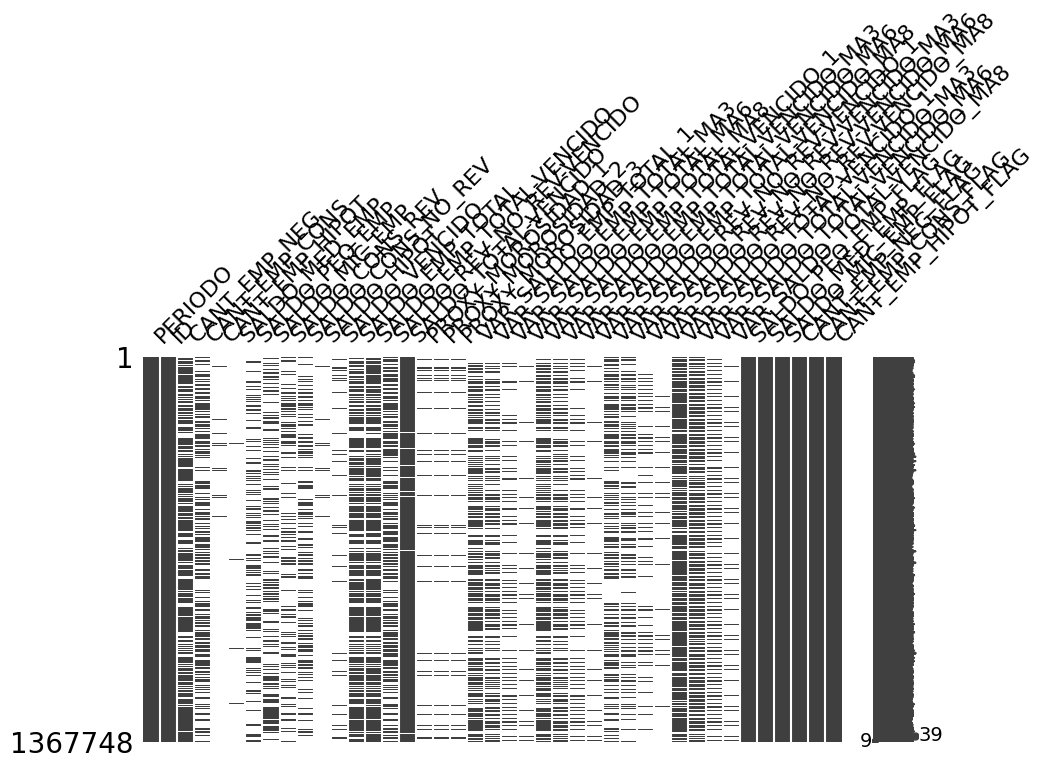

In [18]:
df_aux = df_balances.copy().replace(0, np.nan)
msno.matrix(df_aux, figsize=(10, 5))

In [4]:
df_balances = pd.read_parquet('../data/processed/balances.gzip')
df_balances.head(9*3)

,PERIODO,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,SALDO_EMP_TOTAL,SALDO_EMP_TOTAL-VENCIDO,SALDO_REV_NO_REV-VENCIDO,SALDO_TOTAL-VENCIDO,PROXY_MOROSIDAD_1,PROXY_MOROSIDAD_2,PROXY_MOROSIDAD_3,VAR_SALDO_EMP_TOTAL_1,VAR_SALDO_EMP_TOTAL_MA3,VAR_SALDO_EMP_TOTAL_MA6,VAR_SALDO_EMP_TOTAL_MA8,VAR_SALDO_EMP_TOTAL-VENCIDO_1,VAR_SALDO_EMP_TOTAL-VENCIDO_MA3,VAR_SALDO_EMP_TOTAL-VENCIDO_MA6,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8,VAR_SALDO_REV_NO_REV-VENCIDO_1,VAR_SALDO_REV_NO_REV-VENCIDO_MA3,VAR_SALDO_REV_NO_REV-VENCIDO_MA6,VAR_SALDO_REV_NO_REV-VENCIDO_MA8,VAR_SALDO_TOTAL-VENCIDO_1,VAR_SALDO_TOTAL-VENCIDO_MA3,VAR_SALDO_TOTAL-VENCIDO_MA6,VAR_SALDO_TOTAL-VENCIDO_MA8,SALDO_PEQ_EMP_FLAG,SALDO_MED_EMP_FLAG,SALDO_MIC_EMP_FLAG,CANT_EMP_NEG_FLAG,CANT_EMP_CONS_FLAG,CANT_EMP_HIPOT_FLAG
0,202301,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,405.000000,0.000000,0.000000,0.000000,0.000000,405.000000,405.000000,0.000000,405.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,True,False,False
1,202302,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,346.566600,0.000000,0.000000,0.000000,0.000000,346.566600,346.566600,0.000000,346.566600,0.000000,0.000000,NaN,-0.144280,NaN,NaN,NaN,-0.144280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.144280,NaN,NaN,NaN,False,False,True,True,False,False
2,202303,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,283.086900,0.000000,0.000000,0.000000,0.000000,283.086900,283.086900,0.000000,283.086900,0.000000,0.000000,NaN,-0.183167,NaN,NaN,NaN,-0.183167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.183167,NaN,NaN,NaN,False,False,True,True,False,False
3,202304,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,217.987200,0.000000,0.000000,0.000000,0.000000,217.987200,217.987200,0.000000,217.987200,0.000000,0.000000,NaN,-0.229964,-0.185804,NaN,NaN,-0.229964,-0.185804,NaN,NaN,NaN,NaN,NaN,NaN,-0.229964,-0.185804,NaN,NaN,False,False,True,True,False,False
4,202305,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,148.942800,0.000000,0.000000,0.000000,0.000000,148.942800,148.942800,0.000000,148.942800,0.000000,0.000000,NaN,-0.316736,-0.243289,NaN,NaN,-0.316736,-0.243289,NaN,NaN,NaN,NaN,NaN,NaN,-0.316736,-0.243289,NaN,NaN,False,False,True,True,False,False
5,202306,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,76.512600,0.000000,0.000000,0.000000,0.000000,76.512600,76.512600,0.000000,76.512600,0.000000,0.000000,NaN,-0.486295,-0.344332,NaN,NaN,-0.486295,-0.344332,NaN,NaN,NaN,NaN,NaN,NaN,-0.486295,-0.344332,NaN,NaN,False,False,True,True,False,False
6,202307,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,1215.000000,0.000000,1826.041500,0.000000,0.000000,1215.000000,1215.000000,1826.041500,3041.041500,0.000000,0.000000,0.000000,14.879737,4.692235,2.253216,NaN,14.879737,4.692235,2.253216,NaN,inf,NaN,NaN,NaN,38.745630,12.647533,6.230865,NaN,False,False,True,True,True,False
7,202308,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,1038.573900,0.000000,1826.041500,0.000000,0.000000,1038.573900,1038.573900,1826.041500,2864.615400,0.000000,0.000000,0.000000,-0.145207,4.749412,2.253061,NaN,-0.145207,4.749412,2.253061,NaN,0.000000,NaN,NaN,NaN,-0.058015,12.733773,6.245242,NaN,False,False,True,True,True,False
8,202309,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,852.508800,0.000000,1620.550100,0.000000,0.000000,852.508800,852.508800,1620.550100,2473.058900,0.000000,0.000000,0.000000,-0.179154,4.851792,2.253730,1.649367,-0.179154,4.851792,2.253730,1.649367,-0.112534,NaN,NaN,NaN,-0.136687,12.850309,6.252989,4.648811,False,False,True,True,True,False
9,202301,26b25bfb3c114bf89e4112eb21b1c553,1,0,0,0.000000,0.000000,2459.897100,0.000000,0.000000,0.000000,0.000000,2459.897100,2459.897100,0.000000,2459.897100,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,True,False,False


In [26]:
df_balances.columns

Index(['PERIODO', 'ID', 'CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT',
       'SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV',
       'SALDO_CONS_NO_REV', 'SALDO_HIPOT', 'SALDO_VENCIDO', 'SALDO_EMP_TOTAL',
       'SALDO_EMP_TOTAL-VENCIDO', 'SALDO_REV_NO_REV-VENCIDO',
       'SALDO_TOTAL-VENCIDO', 'CANT_MESES_SALDO_VENCIDO',
       'VAR_SALDO_EMP_TOTAL_MA8', 'VAR_SALDO_EMP_TOTAL-VENCIDO_MA8',
       'VAR_SALDO_REV_NO_REV-VENCIDO_MA8', 'VAR_SALDO_TOTAL-VENCIDO_MA8'],
      dtype='object')

In [ ]:
"""
CANT_EMP_DOL_NEG - Cantidad de empresas de negocios en dólares
SALDO_DOLA_NEG - Saldo en dólares de negocio
CANT_EMP_DOL_CONS - Cantidad de empresas de consumo en dólares
SALDO_DOLA_CONS - Saldo en dólares de consumo
CANT_EMP_DOL_HIPOT - Cantidad de empresas de hipotecario en dólares
SALDO_DOLA_HIPOT - Saldo en dólares de hipotecario
MAX_LINEA_DISP_U6M - Línea Máxima disponible en los últimos 6 meses
"""

In [1]:
df_balances_unirow = df_balances.groupby('ID').agg(
    {
        'CANT_EMP_NEG': ['max', 'last'],
        'CANT_EMP_CONS': ['max', 'last'],
        'CANT_EMP_HIPOT': ['max', 'last'],
        'CANT_MESES_SALDO_VENCIDO': ['max'],
        'SALDO_MED_EMP': ['mean'],
        'SALDO_PEQ_EMP': ['mean'],
        'SALDO_MIC_EMP': ['mean'],
        'SALDO_CONS_REV': ['mean'],
        'SALDO_CONS_NO_REV': ['mean'],
        'SALDO_HIPOT': ['mean'],
        'SALDO_VENCIDO': ['mean'],

        'SALDO_EMP_TOTAL': ['mean'],

        'VAR_SALDO_EMP_TOTAL_MA8' : ['mean'], 
        'VAR_SALDO_EMP_TOTAL-VENCIDO_MA8' : ['mean'],
        'VAR_SALDO_REV_NO_REV-VENCIDO_MA8' : ['mean'],
        'VAR_SALDO_TOTAL-VENCIDO_MA8' : ['mean'],
        'SALDO_DOLA_HIPOT': ['sum'],
        'MAX_LINEA_DISP_U6M': ['max', 'mean']

    }
).replace([np.inf, -np.inf], np.nan).fillna(0)

df_balances_unirow.columns = ['_'.join(col) for col in df_balances_unirow.columns.values]
df_balances_unirow = df_balances_unirow.reset_index()

df_balances_unirow

SyntaxError: invalid syntax (284455137.py, line 22)

In [29]:
nc, cc = get_cols(df_balances_unirow)
df_balances_unirow[nc].std(numeric_only=True).reset_index().sort_values(by=0, ascending=False)

,index,0
14,SALDO_EMP_TOTAL_mean,83345.504921
12,SALDO_HIPOT_mean,46381.911329
7,SALDO_MED_EMP_mean,41377.176979
11,SALDO_CONS_NO_REV_mean,39816.637510
8,SALDO_PEQ_EMP_mean,28713.587742
13,SALDO_VENCIDO_mean,12407.132689
18,VAR_SALDO_TOTAL-VENCIDO_MA8_mean,9601.550267
9,SALDO_MIC_EMP_mean,7361.223768
10,SALDO_CONS_REV_mean,6404.416168
16,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8_mean,6305.111702


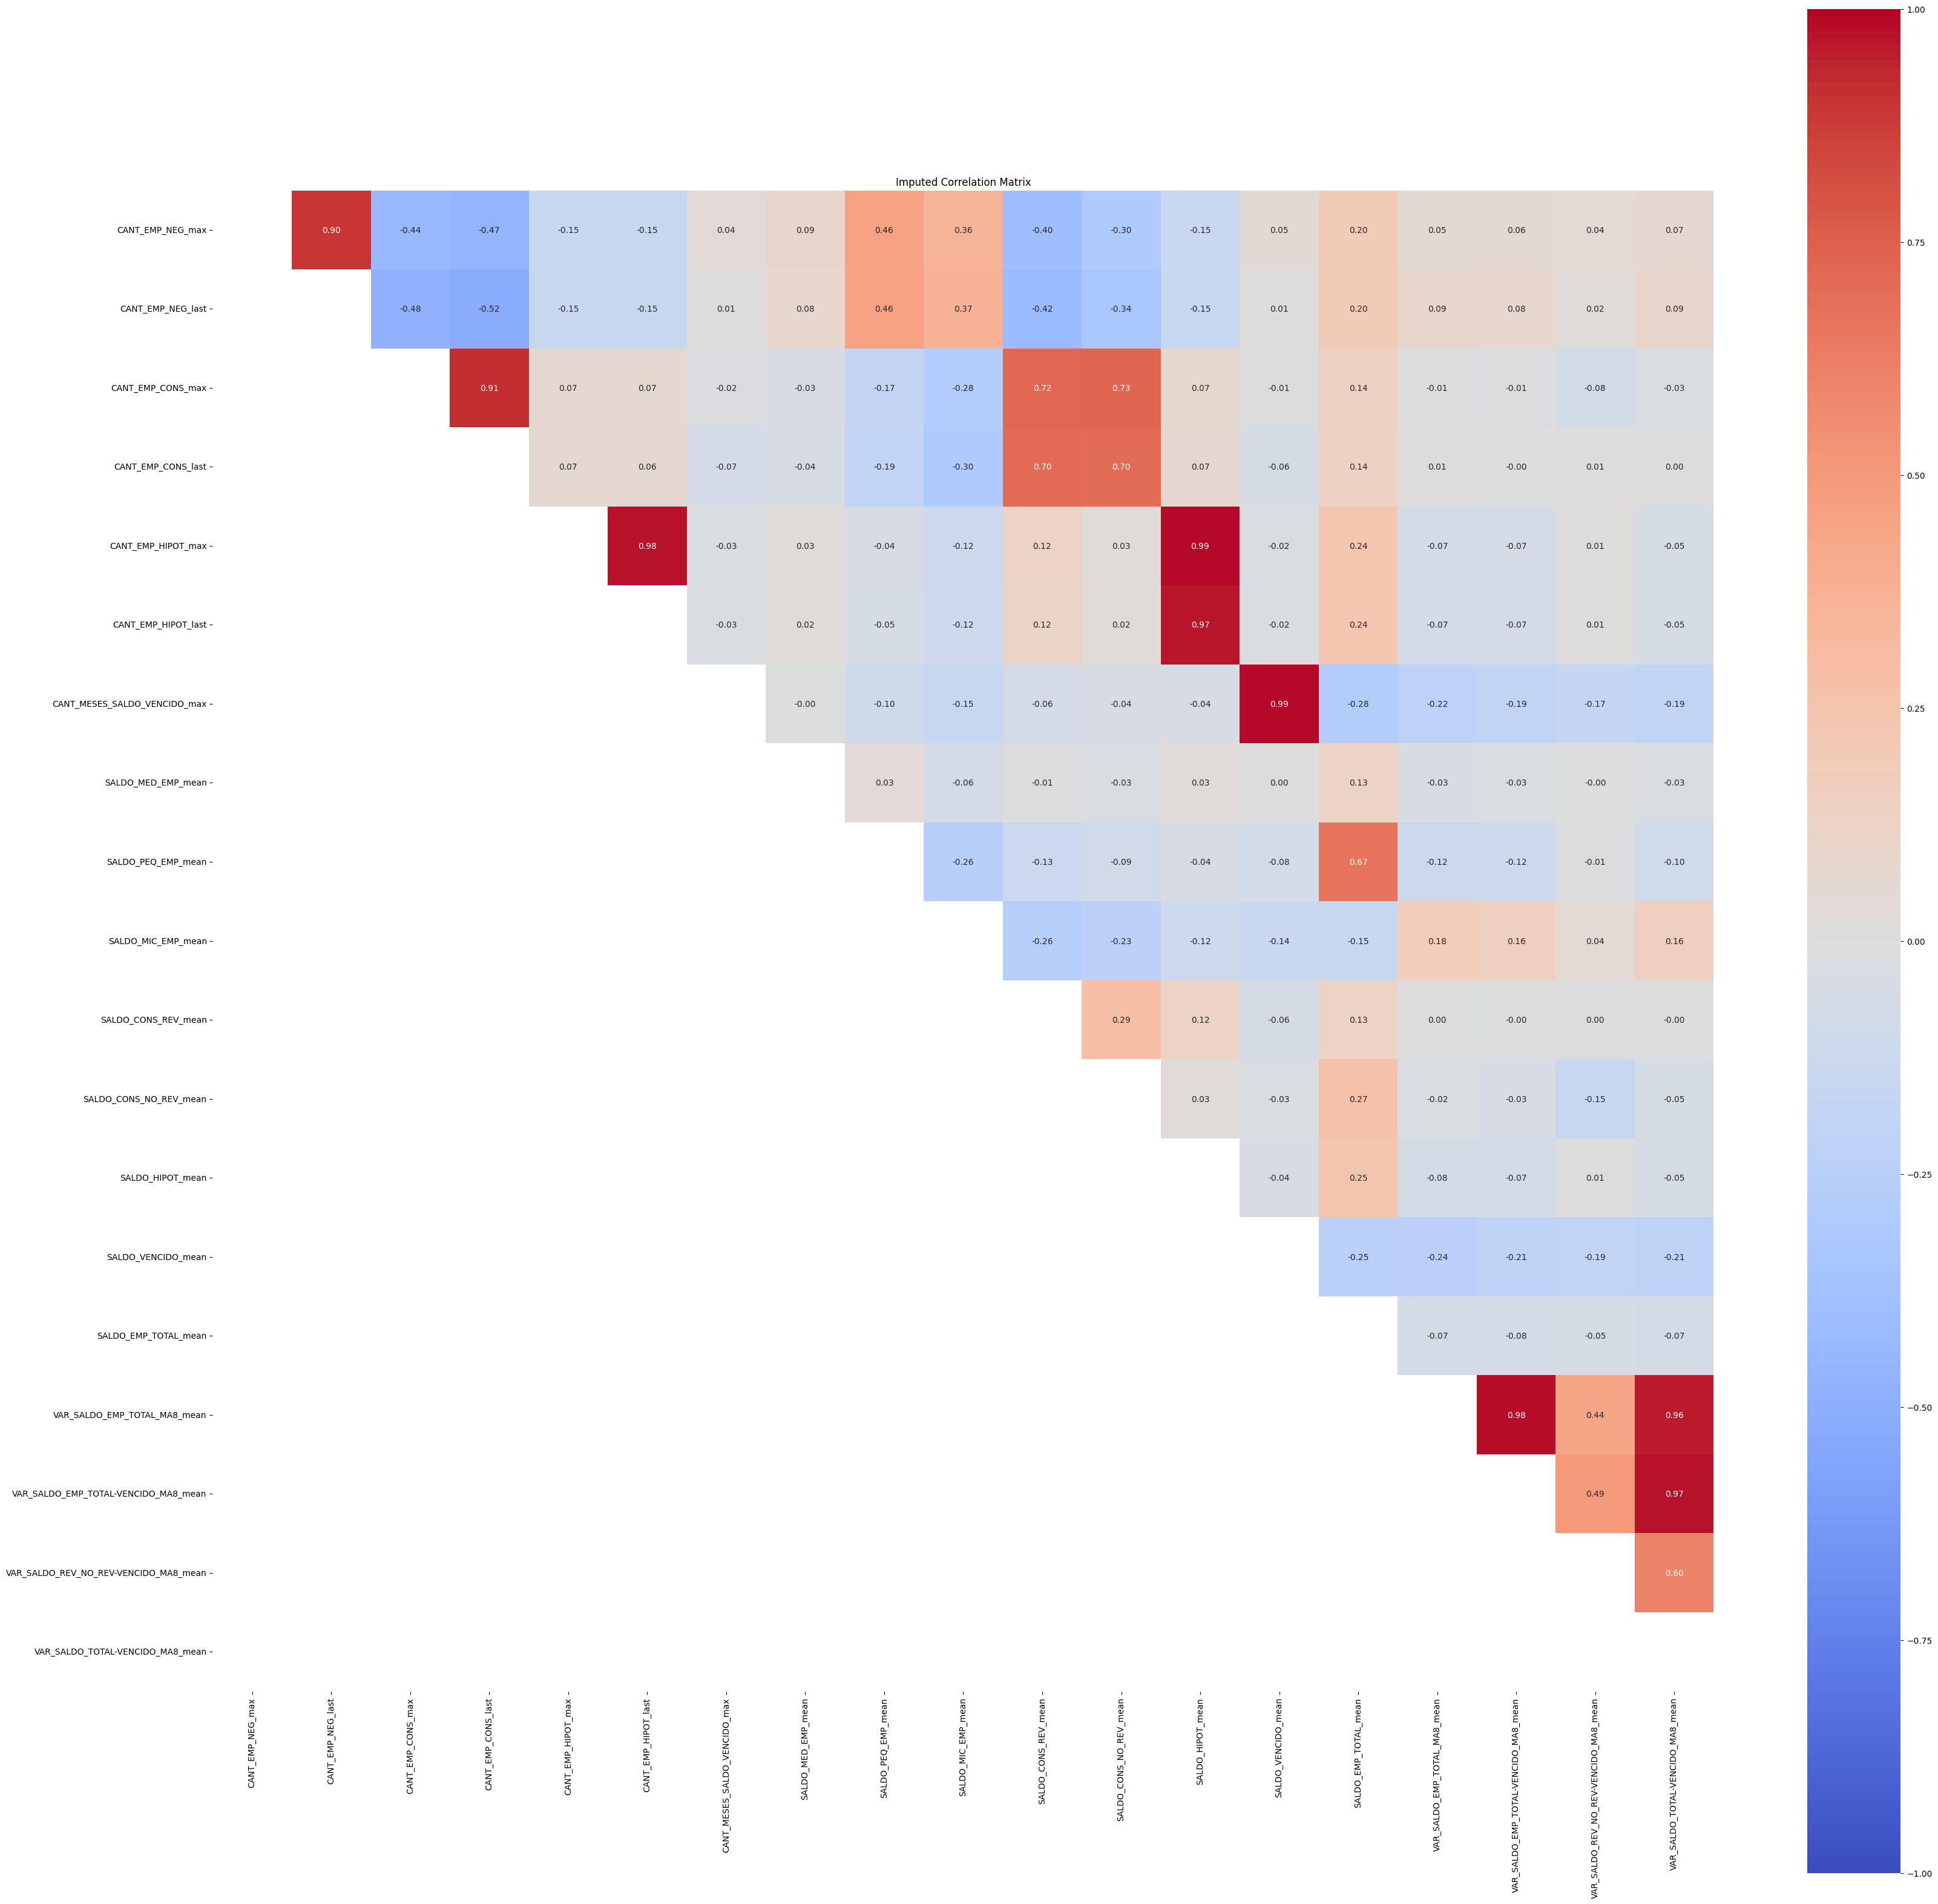

In [30]:
import numpy as np

corr_mat = df_balances_unirow[nc].corr(method='spearman')
mask = np.tril(np.ones_like(corr_mat, dtype=bool))  # create a mask to hide the lower triangle of the heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt='.2f', mask=mask)  # add the mask to the heatmap
plt.title('Imputed Correlation Matrix')
plt.show()

# *customers*

In [32]:
df_customers = (
    pd.read_csv('../data/raw/customers.csv')
    .assign(
        PER_BANCARIZACION = lambda row: row['PER_BANCARIZACION'].astype(str)
    )
    .assign(
        ANIO_BANCARIZACION = lambda row: row['PER_BANCARIZACION'].str[:4],
        MES_BANCARIZACION = lambda row: row['PER_BANCARIZACION'].str[5:7]
    )
    .assign(
        ANIO_BANCARIZACION = lambda row: row['ANIO_BANCARIZACION'].astype(int),
        MES_BANCARIZACION = lambda row: row['MES_BANCARIZACION'].astype(int)
    )
    .drop(columns=['PER_BANCARIZACION'])
)
df_customers['CO_TIPO_SEXO'] = df_customers['CO_TIPO_SEXO'].astype('category')

df_customers

,ID,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,ANIO_BANCARIZACION,MES_BANCARIZACION
0,8bd775237f2f4c7cae87c255e9e71d62,1,48.000000,CAJAMARCA,CONTUMAZA,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2013,7
1,2409b242893e4ea4b7e6af1292030666,3,NaN,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2017,9
2,65edb7eb9d144b2184ef76ec2c35cdf8,1,38.000000,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2008,2
3,2fef711096234036807b01a5a697a81c,1,61.000000,TACNA,TACNA,"VTA. MIN. ALIMENTOS, BEBIDAS, TABACO.",2006,1
4,796443da390d409ba3e7b775fde576cd,3,29.000000,LAMBAYEQUE,CHICLAYO,OTRAS ACTIVID.DE TIPO SERVICIO NCP,2014,6
...,...,...,...,...,...,...,...,...
151967,54a73b9c515f46d19c0182e3f44f44fe,3,25.000000,NaN,NaN,VTA. MIN. PROD. FARMAC. Y ART. TOCADOR.,2021,8
151968,1df55d6b6af544b58312d68241a10e4f,3,32.000000,LAMBAYEQUE,CHICLAYO,TRANSPORTE DE CARGA POR CARRETERA.,2018,9
151969,5dd4a95d877d4474a277173c6fe4d227,1,62.000000,NaN,NaN,TRANSPORTE DE CARGA POR CARRETERA.,2006,1
151970,cbad53becdb042cfb98a992566ec0e94,2,51.000000,NaN,NaN,OTROS TIPOS DE VENTA AL POR MENOR.,2013,2


In [33]:
df_customers.dtypes

ID                      object
CO_TIPO_SEXO          category
EDAD                   float64
NO_DEPARTAMENTO         object
NO_PROVINCIA            object
DE_CIIU                 object
ANIO_BANCARIZACION       int64
MES_BANCARIZACION        int64
dtype: object

In [34]:
df_customers['CO_TIPO_SEXO'].value_counts(normalize=True)

2   0.344030
1   0.328903
3   0.327067
Name: CO_TIPO_SEXO, dtype: float64

In [35]:
df_customers['NO_DEPARTAMENTO'].value_counts(normalize=True)
# * IDEA: Agrupar por regiones

LAMBAYEQUE      0.227646
AREQUIPA        0.092984
JUNIN           0.078265
CAJAMARCA       0.075917
ANCASH          0.063730
PASCO           0.061198
LA LIBERTAD     0.045141
TUMBES          0.041704
PIURA           0.038372
ICA             0.037060
PUNO            0.026408
HUANUCO         0.025109
CALLAO          0.024715
AYACUCHO        0.023968
HUANCAVELICA    0.023167
MADRE DE DIOS   0.017723
AMAZONAS        0.015952
TACNA           0.015939
SAN MARTIN      0.014863
UCAYALI         0.013932
LIMA            0.010246
APURIMAC        0.008842
LORETO          0.006533
CUSCO           0.005392
MOQUEGUA        0.005195
Name: NO_DEPARTAMENTO, dtype: float64

In [36]:
display(df_customers['DE_CIIU'].value_counts(normalize=True))

OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n   0.392349
OTRAS ACTIVID.DE TIPO SERVICIO NCP                  0.165294
OTRAS ACTIVIDADES EMPRESARIALES NCP.                0.062110
VTA.  MIN. ALIMENTOS, BEBIDAS, TABACO.              0.033756
RESTAURANTES, BARES Y CANTINAS.                     0.029604
                                                      ...   
ACTIVIDADES POSTALES NACIONALES                     0.000007
BANCA CENTRAL                                       0.000007
ED. DE MATERIALES GRABADOS.                         0.000007
FAB. INSTRUMENTOS OPTICOS.                          0.000007
SERV. PETROLEROS Y DE GAS..                         0.000007
Name: DE_CIIU, Length: 256, dtype: float64

<Axes: >

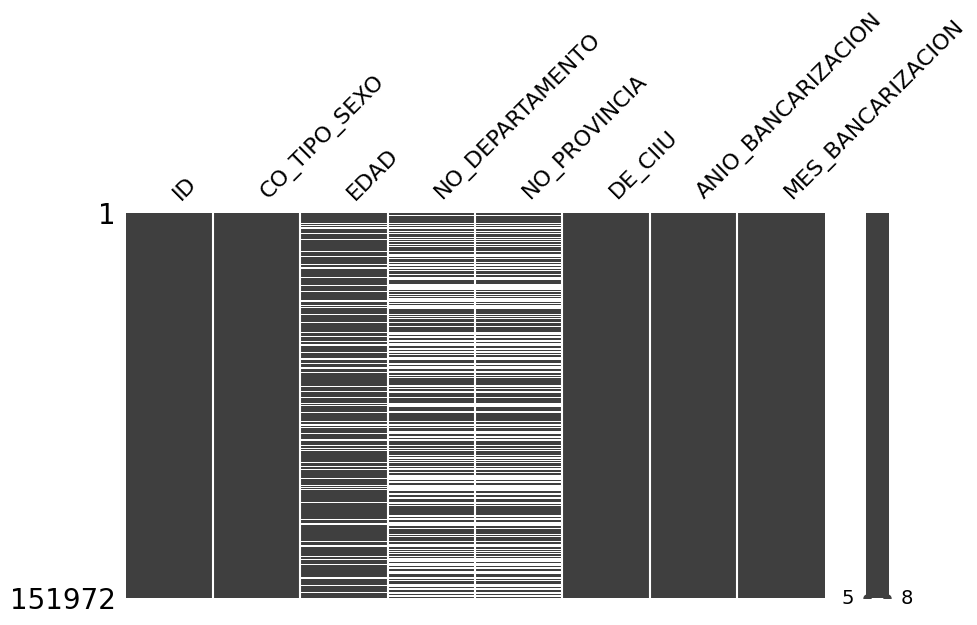

In [37]:
msno.matrix(df_customers, figsize=(10, 5))

# *JOIN*

In [38]:
df_join = df_customers.drop(columns=['NO_DEPARTAMENTO', 'NO_PROVINCIA', 'DE_CIIU']).merge(
    df_balances_unirow, how='left', on='ID'
)

In [39]:
df_join['EDAD'].describe()

count   126566.000000
mean        46.586445
std         11.830842
min         19.000000
25%         38.000000
50%         45.000000
75%         55.000000
max        107.000000
Name: EDAD, dtype: float64

/tmp/ipykernel_11271/1546855181.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_join['EDAD'], shade=True)


<Axes: xlabel='EDAD', ylabel='Density'>

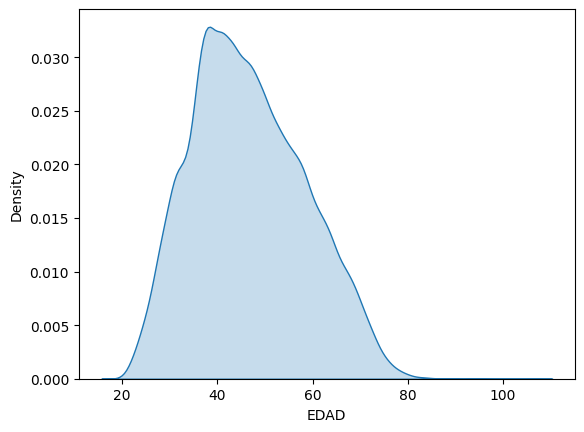

In [40]:
sns.kdeplot(df_join['EDAD'], shade=True)

In [20]:
# # fillna EDAD with KNN
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# df_join['EDAD'] = imputer.fit_transform(df_join[['EDAD']])
# sns.kdeplot(df_join['EDAD'], shade=True)

In [41]:
df_join.isna().sum()

ID                                           0
CO_TIPO_SEXO                                 0
EDAD                                     25406
ANIO_BANCARIZACION                           0
MES_BANCARIZACION                            0
CANT_EMP_NEG_max                             0
CANT_EMP_NEG_last                            0
CANT_EMP_CONS_max                            0
CANT_EMP_CONS_last                           0
CANT_EMP_HIPOT_max                           0
CANT_EMP_HIPOT_last                          0
CANT_MESES_SALDO_VENCIDO_max                 0
SALDO_MED_EMP_mean                           0
SALDO_PEQ_EMP_mean                           0
SALDO_MIC_EMP_mean                           0
SALDO_CONS_REV_mean                          0
SALDO_CONS_NO_REV_mean                       0
SALDO_HIPOT_mean                             0
SALDO_VENCIDO_mean                           0
SALDO_EMP_TOTAL_mean                         0
VAR_SALDO_EMP_TOTAL_MA8_mean                 0
VAR_SALDO_EMP

In [42]:
nc, cc = get_cols(df_join)
df_join[nc].std(numeric_only=True).reset_index().sort_values(by=0, ascending=False)

,index,0
17,SALDO_EMP_TOTAL_mean,83345.504921
15,SALDO_HIPOT_mean,46381.911329
10,SALDO_MED_EMP_mean,41377.176979
14,SALDO_CONS_NO_REV_mean,39816.637510
11,SALDO_PEQ_EMP_mean,28713.587742
16,SALDO_VENCIDO_mean,12407.132689
21,VAR_SALDO_TOTAL-VENCIDO_MA8_mean,9601.550267
12,SALDO_MIC_EMP_mean,7361.223768
13,SALDO_CONS_REV_mean,6404.416168
19,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8_mean,6305.111702


In [43]:
df_join.dtypes

ID                                         object
CO_TIPO_SEXO                             category
EDAD                                      float64
ANIO_BANCARIZACION                          int64
MES_BANCARIZACION                           int64
CANT_EMP_NEG_max                            int64
CANT_EMP_NEG_last                           int64
CANT_EMP_CONS_max                           int64
CANT_EMP_CONS_last                          int64
CANT_EMP_HIPOT_max                          int64
CANT_EMP_HIPOT_last                         int64
CANT_MESES_SALDO_VENCIDO_max                int64
SALDO_MED_EMP_mean                        float64
SALDO_PEQ_EMP_mean                        float64
SALDO_MIC_EMP_mean                        float64
SALDO_CONS_REV_mean                       float64
SALDO_CONS_NO_REV_mean                    float64
SALDO_HIPOT_mean                          float64
SALDO_VENCIDO_mean                        float64
SALDO_EMP_TOTAL_mean                      float64


In [44]:
df_train = pd.read_csv('../data/raw/train.csv').merge(df_join, how='left', on='ID')
df_test = pd.read_csv('../data/raw/test.csv').merge(df_join, how='left', on='ID')

In [45]:
df_test.isna().sum()

ID                                           0
TARGET                                   60789
CO_TIPO_SEXO                                 0
EDAD                                     10113
ANIO_BANCARIZACION                           0
MES_BANCARIZACION                            0
CANT_EMP_NEG_max                             0
CANT_EMP_NEG_last                            0
CANT_EMP_CONS_max                            0
CANT_EMP_CONS_last                           0
CANT_EMP_HIPOT_max                           0
CANT_EMP_HIPOT_last                          0
CANT_MESES_SALDO_VENCIDO_max                 0
SALDO_MED_EMP_mean                           0
SALDO_PEQ_EMP_mean                           0
SALDO_MIC_EMP_mean                           0
SALDO_CONS_REV_mean                          0
SALDO_CONS_NO_REV_mean                       0
SALDO_HIPOT_mean                             0
SALDO_VENCIDO_mean                           0
SALDO_EMP_TOTAL_mean                         0
VAR_SALDO_EMP

In [46]:
df_train.isna().sum()

ID                                           0
TARGET                                       0
CO_TIPO_SEXO                                 0
EDAD                                     15293
ANIO_BANCARIZACION                           0
MES_BANCARIZACION                            0
CANT_EMP_NEG_max                             0
CANT_EMP_NEG_last                            0
CANT_EMP_CONS_max                            0
CANT_EMP_CONS_last                           0
CANT_EMP_HIPOT_max                           0
CANT_EMP_HIPOT_last                          0
CANT_MESES_SALDO_VENCIDO_max                 0
SALDO_MED_EMP_mean                           0
SALDO_PEQ_EMP_mean                           0
SALDO_MIC_EMP_mean                           0
SALDO_CONS_REV_mean                          0
SALDO_CONS_NO_REV_mean                       0
SALDO_HIPOT_mean                             0
SALDO_VENCIDO_mean                           0
SALDO_EMP_TOTAL_mean                         0
VAR_SALDO_EMP

In [47]:
display(df_train['TARGET'].value_counts(normalize=True))
display(df_test['TARGET'].value_counts(normalize=True))

0   0.849994
1   0.150006
Name: TARGET, dtype: float64

Series([], Name: TARGET, dtype: float64)

In [49]:
df_train.to_parquet('../data/processed/train_v2.gzip', compression='gzip')
df_test.to_parquet('../data/processed/test_v2.gzip', compression='gzip')

In [51]:
df_test.isna().sum()

ID                                           0
TARGET                                   60789
CO_TIPO_SEXO                                 0
EDAD                                     10113
ANIO_BANCARIZACION                           0
MES_BANCARIZACION                            0
CANT_EMP_NEG_max                             0
CANT_EMP_NEG_last                            0
CANT_EMP_CONS_max                            0
CANT_EMP_CONS_last                           0
CANT_EMP_HIPOT_max                           0
CANT_EMP_HIPOT_last                          0
CANT_MESES_SALDO_VENCIDO_max                 0
SALDO_MED_EMP_mean                           0
SALDO_PEQ_EMP_mean                           0
SALDO_MIC_EMP_mean                           0
SALDO_CONS_REV_mean                          0
SALDO_CONS_NO_REV_mean                       0
SALDO_HIPOT_mean                             0
SALDO_VENCIDO_mean                           0
SALDO_EMP_TOTAL_mean                         0
VAR_SALDO_EMP

In [52]:
df_train.isna().sum()

ID                                           0
TARGET                                       0
CO_TIPO_SEXO                                 0
EDAD                                     15293
ANIO_BANCARIZACION                           0
MES_BANCARIZACION                            0
CANT_EMP_NEG_max                             0
CANT_EMP_NEG_last                            0
CANT_EMP_CONS_max                            0
CANT_EMP_CONS_last                           0
CANT_EMP_HIPOT_max                           0
CANT_EMP_HIPOT_last                          0
CANT_MESES_SALDO_VENCIDO_max                 0
SALDO_MED_EMP_mean                           0
SALDO_PEQ_EMP_mean                           0
SALDO_MIC_EMP_mean                           0
SALDO_CONS_REV_mean                          0
SALDO_CONS_NO_REV_mean                       0
SALDO_HIPOT_mean                             0
SALDO_VENCIDO_mean                           0
SALDO_EMP_TOTAL_mean                         0
VAR_SALDO_EMP

In [53]:
df_train['ID'].isin(df_balances['ID']).value_counts()

True    91183
Name: ID, dtype: int64

In [54]:
df_test['ID'].isin(df_balances['ID']).value_counts()

True    60789
Name: ID, dtype: int64

In [55]:
df_train['ID'].isin(df_customers['ID']).value_counts()

True    91183
Name: ID, dtype: int64

In [56]:
df_test['ID'].isin(df_customers['ID']).value_counts()

True    60789
Name: ID, dtype: int64

In [57]:
df_train.dtypes

ID                                         object
TARGET                                      int64
CO_TIPO_SEXO                             category
EDAD                                      float64
ANIO_BANCARIZACION                          int64
MES_BANCARIZACION                           int64
CANT_EMP_NEG_max                            int64
CANT_EMP_NEG_last                           int64
CANT_EMP_CONS_max                           int64
CANT_EMP_CONS_last                          int64
CANT_EMP_HIPOT_max                          int64
CANT_EMP_HIPOT_last                         int64
CANT_MESES_SALDO_VENCIDO_max                int64
SALDO_MED_EMP_mean                        float64
SALDO_PEQ_EMP_mean                        float64
SALDO_MIC_EMP_mean                        float64
SALDO_CONS_REV_mean                       float64
SALDO_CONS_NO_REV_mean                    float64
SALDO_HIPOT_mean                          float64
SALDO_VENCIDO_mean                        float64
